In [1]:
# Import necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.use('Agg')  # Ensure agg backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # In case only plt is imported
%matplotlib inline

# For encoding categorical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# For predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score

# Set seaborn style for better visuals
sns.set(style="whitegrid")

In [2]:
# Load the Students Academic Performance Dataset
data_path = 'StudentsPerformance.csv'
df = pd.read_csv(data_path, encoding='ascii')

# Display the first few rows of the dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Check info, data types, and missing values
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
Missing values in each column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing scor

<Figure size 1200x400 with 0 Axes>

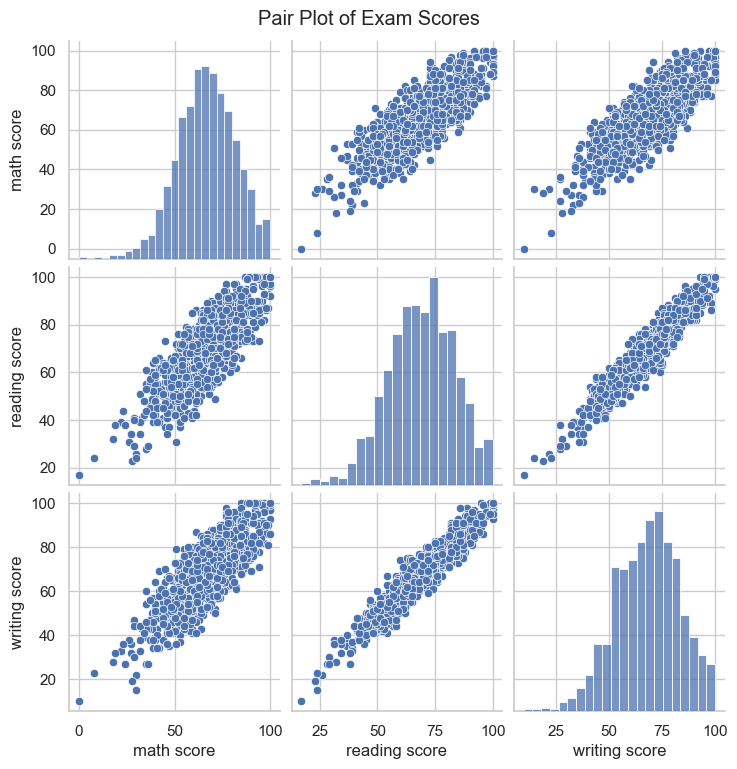

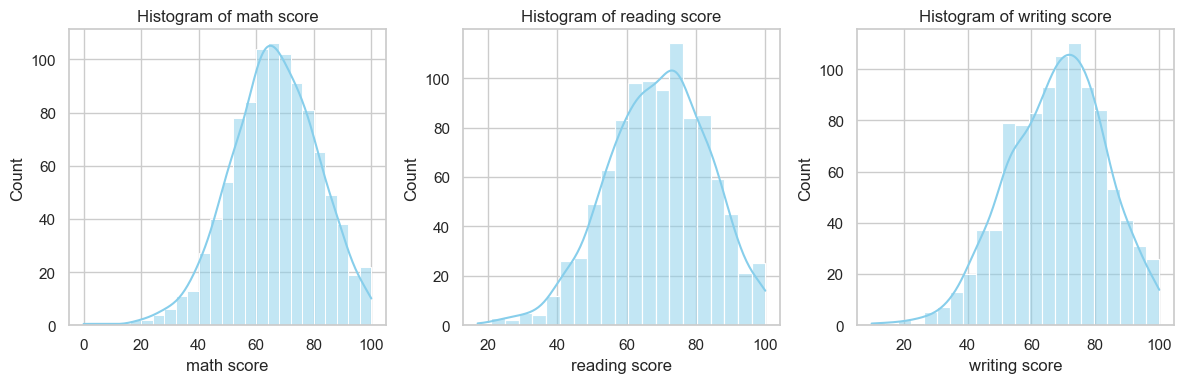

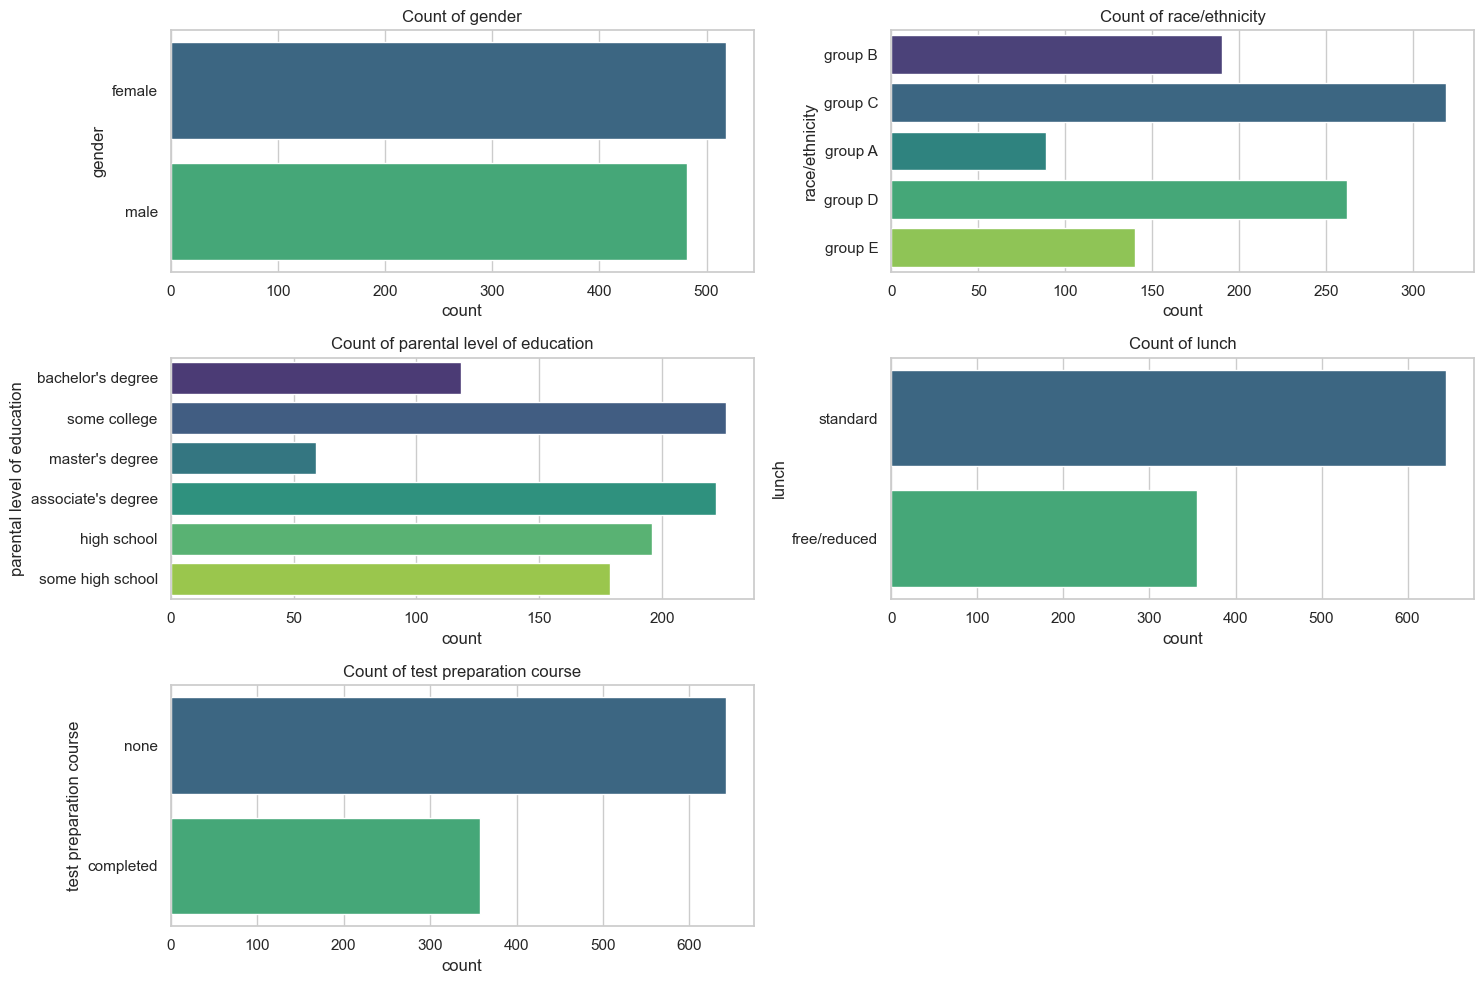

In [4]:
# Pair Plot for numeric columns
numeric_cols = ['math score', 'reading score', 'writing score']
plt.figure(figsize=(12,4))
sns.pairplot(df[numeric_cols])
plt.suptitle('Pair Plot of Exam Scores', y=1.02)
plt.show()

# Histogram for each exam score
plt.figure(figsize=(12, 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Count plot for categorical columns: gender, race/ethnicity, parental level of education, lunch, test preparation course
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i+1)
    sns.countplot(y=col, data=df, palette='viridis')
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

In [5]:
# Encoding Categorical data
columns = df.iloc[:,:-3]
columns.columns

ct = ColumnTransformer(transformers=[('encoding', OneHotEncoder(drop='first'), columns.columns)], remainder='passthrough')
df = pd.DataFrame(ct.fit_transform(df),columns=ct.get_feature_names_out()).astype(int)

# Check data encoded
df.head()

,encoding__gender_male,encoding__race/ethnicity_group B,encoding__race/ethnicity_group C,encoding__race/ethnicity_group D,encoding__race/ethnicity_group E,encoding__parental level of education_bachelor's degree,encoding__parental level of education_high school,encoding__parental level of education_master's degree,encoding__parental level of education_some college,encoding__parental level of education_some high school,encoding__lunch_standard,encoding__test preparation course_none,remainder__math score,remainder__reading score,remainder__writing score
0,0,1,0,0,0,1,0,0,0,0,1,1,72,72,74
1,0,0,1,0,0,0,0,0,1,0,1,0,69,90,88
2,0,1,0,0,0,0,0,1,0,0,1,1,90,95,93
3,1,0,0,0,0,0,0,0,0,0,0,1,47,57,44
4,1,0,1,0,0,0,0,0,1,0,1,1,76,78,75


R2 Score for predicting math score: 88.04%


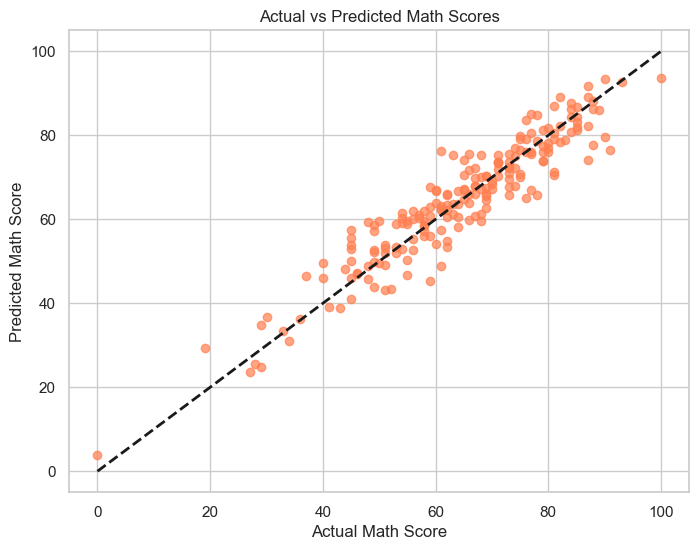

In [6]:
# Prepare features and target
X = df.drop('remainder__math score',axis=1).values
y = df['remainder__math score'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the R2 score as a measure of prediction accuracy
accuracy = r2_score(y_test, y_pred)
print(f"R2 Score for predicting math score: {accuracy * 100:.2f}%")

# A scatter plot to visualize the actual vs predicted math scores
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='coral')
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual vs Predicted Math Scores')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [7]:
# Accuracy in all model regression
regressors = {
    'Linear Regression': LinearRegression(),
    
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    
    'Lasso Regression': Lasso(alpha=0.01, random_state=42),
    
    'Support Vector Regressor (SVR)': SVR(
        kernel='rbf',        
        C=1.0,               
        epsilon=0.1,         
        gamma='scale'        
    ),
    
    'Decision Tree Regressor': DecisionTreeRegressor(
        criterion='squared_error',  
        max_depth=None,             
        random_state=42
    ),
    
    'Random Forest Regressor': RandomForestRegressor(
        n_estimators=100,   
        max_depth=None,
        random_state=42,
        n_jobs=-1           
    ),
    
    'Gradient Boosting Regressor': GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ),
    
    'XGBoost Regressor': XGBRegressor(
        n_estimators=200,    
        learning_rate=0.1,   
        max_depth=4,         
        subsample=0.8,       
        colsample_bytree=0.8,
        random_state=42,
        objective='reg:squarederror'  
    )
}
def train_all(model,X_train,y_train,X_test,y_test):
    result = {}
    for name,reg in model.items():
        
        regressor = reg
        regressor.fit(X_train,y_train)
        y_pred = regressor.predict(X_test)
        accuracy = r2_score(y_test, y_pred)
        print(f"R2 Score for predicting math score with {name}: {accuracy * 100:.2f}%")
        
    return result

result = train_all(regressors,X_train,y_train,X_test,y_test)

R2 Score for predicting math score with Linear Regression: 88.04%
R2 Score for predicting math score with Ridge Regression: 88.03%
R2 Score for predicting math score with Lasso Regression: 88.09%
R2 Score for predicting math score with Support Vector Regressor (SVR): 62.17%
R2 Score for predicting math score with Decision Tree Regressor: 73.13%
R2 Score for predicting math score with Random Forest Regressor: 84.88%
R2 Score for predicting math score with Gradient Boosting Regressor: 87.29%
R2 Score for predicting math score with XGBoost Regressor: 86.27%


In [ ]:
# With best hyperparameter tuning and k-Fold Cross Validation
parameters = {
    'Linear Regression': [
        {}  # Tidak ada hyperparameter penting yang bisa dituning di model dasar ini
    ],

    'Ridge Regression': [
        {'alpha': [0.01, 0.1, 1.0, 10.0],
         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']}
    ],

    'Lasso Regression': [
        {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
         'selection': ['cyclic', 'random']}
    ],

    'Support Vector Regressor (SVR)': [
        {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
         'C': [0.25, 0.5, 0.75, 1.0],
         'epsilon': [0.01, 0.1, 0.2, 0.5],
         'gamma': ['scale', 'auto']}
    ],

    'Decision Tree Regressor': [
        {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
         'max_depth': [None, 3, 5, 7, 9],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4]}
    ],

    'Random Forest Regressor': [
        {'n_estimators': [50, 100, 200],
         'criterion': ['squared_error', 'absolute_error'],
         'max_depth': [None, 3, 5, 7, 9],
         'min_samples_split': [2, 5, 10],
         'max_features': ['auto', 'sqrt', 'log2']}
    ],

    'Gradient Boosting Regressor': [
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.01, 0.05, 0.1, 0.2],
         'max_depth': [2, 3, 5],
         'subsample': [0.6, 0.8, 1.0],
         'loss': ['squared_error', 'absolute_error', 'huber']}
    ],

    'XGBoost Regressor': [
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.01, 0.05, 0.1],
         'max_depth': [3, 5, 7],
         'subsample': [0.6, 0.8, 1.0],
         'colsample_bytree': [0.6, 0.8, 1.0],
         'gamma': [0, 0.1, 0.3],
         'reg_alpha': [0, 0.01, 0.1],
         'reg_lambda': [0.8, 1.0, 1.2]}
    ]
}
def param_tuning(model, x, y, params):
    acc_and_param = {}
    for name, reg in model.items():
        regressor = reg
        regressor.fit(x,y)
        grid_search = GridSearchCV(estimator=regressor,
                                  param_grid=params[name],
                                  scoring='r2',
                                  cv=10,
                                  n_jobs=-1)
        grid_search.fit(x,y)
        best_acc = grid_search.best_score_
        best_params = grid_search.best_params_
        print(f'Model: {name}')
        print(f"Best Accuracy R2 Score: {best_acc * 100:.2f} %")
        print(f"Best Parameters: {best_params}")
        acc_and_param[name] = {'Best Accuracy':best_acc,
                              'Best Paramteres':best_params}
    return acc_and_param
tuning_hyper = param_tuning(regressors, X_train, y_train, parameters)

Model: Linear Regression
Best Accuracy R2 Score: 86.62 %
Best Parameters: {}
Model: Ridge Regression
Best Accuracy R2 Score: 86.63 %
Best Parameters: {'alpha': 1.0, 'solver': 'auto'}
Model: Lasso Regression
Best Accuracy R2 Score: 86.63 %
Best Parameters: {'alpha': 0.01, 'selection': 'random'}
